In [20]:
import pandas as pd
import wbgapi as wb
import numpy as np
import sklearn.cluster as cluster

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [22]:
country_codes = ['EGY','MDG','NGA','CHN','IND','JPN','QAT','ITA','ESP','FRA','DEU']

In [201]:
# write your code here

# indicators for getting data related to specified indicator
indicator_ids= ['FI.RES.TOTL.CD','NY.GDP.PCAP.CD','SP.POP.GROW','DT.NFL.MIBR.CD']

# mapping a readable name to each indicators to avoid confusion
indicator_dict = {
    'FI.RES.TOTL.CD':'RES',
    'NY.GDP.PCAP.CD':'GDP',
    'SP.POP.GROW' : 'POP',
    'DT.NFL.MIBR.CD':'DEBT'
}

In [202]:
raw_df  = wb.data.DataFrame(indicator_ids, country_codes, time=range(1981, 1990))
df = raw_df
# print(df)
df.reset_index()
df = df.reset_index(level=['economy', 'series'])
df = df.set_axis(['country','indicators','2012','2013','2014','2015','2016','2017','2018','2019','2020'], axis=1)
df = df.set_index('indicators')
df = df.rename(index=indicator_dict)
df = df.reset_index(level=['indicators'])
df = df.set_index(['country','indicators'])
stacked = df.stack()
df = stacked.unstack('indicators')
df['DEBT'].isnull().values.any()

True

In [192]:
df = norm_df(df)
df

indicators            GDP       R&D       RES
country                                      
CHN     2012   197.071474  0.141523  0.080811
        2013   203.334920  0.158204  0.137257
        2014   225.431929  0.155792  0.158730
        2015   250.713969  0.144231  0.170345
        2016   294.458849  0.148549  0.135090
...                   ...       ...       ...
ZAF     2016  1807.976468  0.255901  0.015041
        2017  2015.813567  0.244940  0.017900
        2018  2582.494672  0.235879  0.027585
        2019  2711.515300  0.231472  0.017496
        2020  2756.212148  0.233207  0.017425

[108 rows x 3 columns]

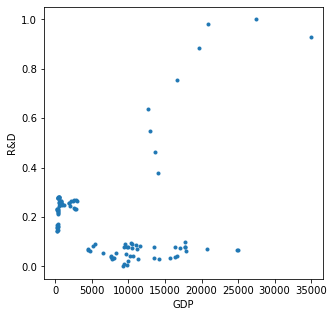

In [193]:
def makeplot(df, col1, col2):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df[col1], df[col2], "o", markersize=3)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    
# exploratory plots
makeplot(df, "GDP", "RES")
# makeplot(df, "maternal_death", "out_pocket_expe")
# makeplot(df, "YR2011", "YR2019")

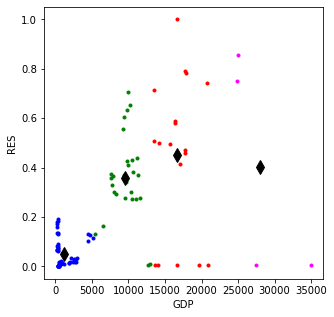

In [196]:
####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = df[["GDP", "RES"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_fit["GDP"][labels==l], df_fit["RES"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("GDP")
plt.ylabel("RES")
plt.show()